# K Nearest Neighbour (KNN) Regression & Bagging

K Nearest Neighbour (KNN) regression can be used to predict a target based on the average values of its k nearest neighbours in the training data. Distance metrics are used to determine the nearest neighbours. 

K-bagging regression also known as Bootstrap Aggregating, is an ensemble learning technique which improves performance and robustness of regression models. It helps to reduce overfitting and variance in predictions. Bagging consists of multiple regression models (ensemble), which are trained on random subsets of the training dataset. These models are then combined and average to produce the final predictions. 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()
import re

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importing the cleaned data set

In [2]:
laptop_data_clean = pd.read_csv('./laptop_data_clean.csv', encoding='latin-1')
laptop_data_clean.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,2103.31
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1411.34
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,902.75
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3983.80
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2831.65


In [3]:
#Encoding the data 

# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
laptop_data_clean['Company'] = le.fit_transform(laptop_data_clean['Company'])
laptop_data_clean['Product'] = le.fit_transform(laptop_data_clean['Product'])
laptop_data_clean['TypeName'] = le.fit_transform(laptop_data_clean['TypeName'])
# laptop_data_clean['Inches'] = le.fit_transform(laptop_data_clean['Inches'])
laptop_data_clean['ScreenResolution'] = le.fit_transform(laptop_data_clean['ScreenResolution'])
# laptop_data_clean['Ram'] = le.fit_transform(laptop_data_clean['Ram'])
laptop_data_clean['Memory'] = le.fit_transform(laptop_data_clean['Memory'])
laptop_data_clean['Cpu'] = le.fit_transform(laptop_data_clean['Cpu'])
laptop_data_clean['Gpu'] = le.fit_transform(laptop_data_clean['Gpu'])
laptop_data_clean['OpSys'] = le.fit_transform(laptop_data_clean['OpSys'])
# laptop_data_clean['Weight'] = le.fit_transform(laptop_data_clean['Weight'])
# laptop_data_clean['Price_euros'] = le.fit_transform(laptop_data_clean['Price_euros'])
laptop_data_clean

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,1,297,4,13.3,10,2,8,4,58,8,1.37,2103.31
1,1,298,4,13.3,1,2,8,2,51,8,1.34,1411.34
2,7,50,3,15.6,3,2,8,16,53,4,1.86,902.75
3,1,297,4,15.4,12,3,16,29,9,8,1.83,3983.80
4,1,297,4,13.3,10,2,8,16,59,8,1.37,2831.65
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,555,0,14.0,3,3,4,4,47,5,1.80,1001.66
1299,10,563,0,13.3,13,3,16,29,47,5,1.30,2353.43
1300,10,193,3,14.0,0,4,2,35,40,5,1.50,359.53
1301,7,2,3,15.6,0,3,6,10,21,5,2.19,1199.48


# Prediction of laptop price using 4 features with the highest correlation with price

In [4]:
laptop_specs = pd.DataFrame(laptop_data_clean[["ScreenResolution", "Gpu", "Ram", "OpSys", "Price_sgd"]])

X = laptop_specs.drop('Price_sgd', axis=1).values
y = laptop_specs['Price_sgd'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Best Hyperparameters for KNeighborsRegressor: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


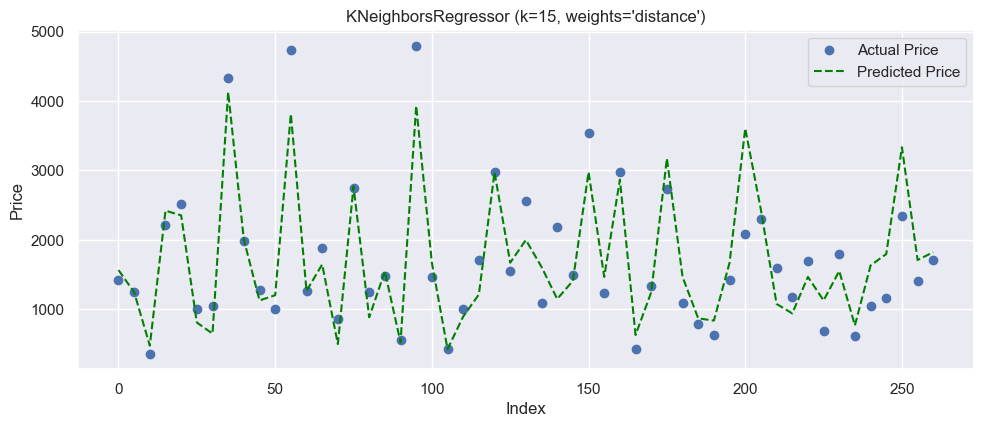

Best Hyperparameters for BaggingRegressor: {'n_estimators': 73}


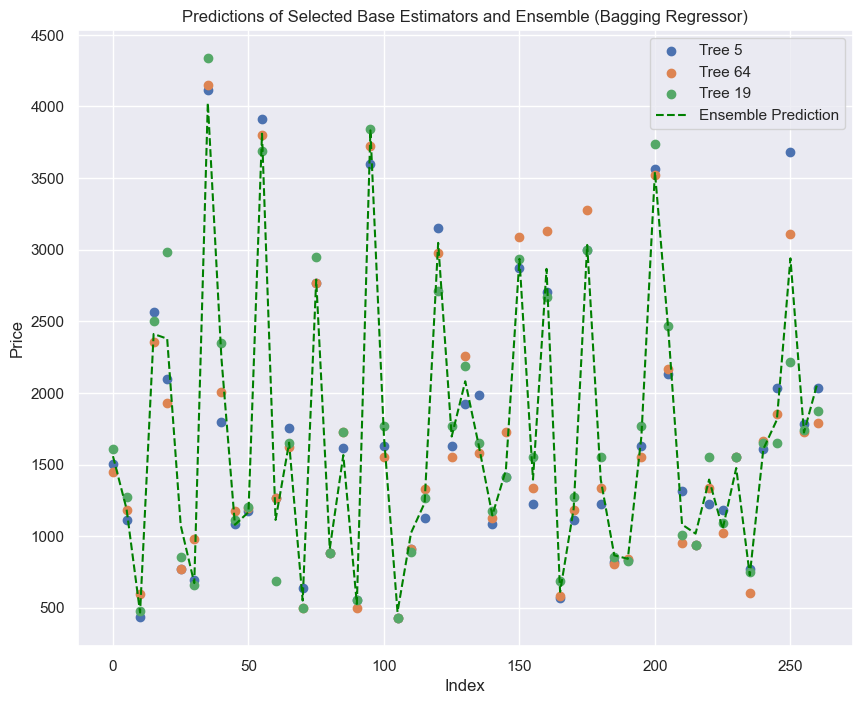

KNN Regressor:
Mean Squared Error: 242789.2479072067
R^2 Score: 0.7829046736348705
Bagging Ensemble:
Mean Squared Error: 219952.71709183286
R^2 Score: 0.8033244580905057


Enter RAM (in GB):  8
Enter GPU:  58
Enter screen resolution:  10
Enter operating system:  8


Predicted price for the new laptop: $2243.715
Predicted price for the new laptop (Bagging): $2305.434295012394


In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


#Standardise features by removing mean & scaling to unit variance
scaler = StandardScaler()  

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def random_search(estimator, param_distributions, X_train, y_train, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42):
    
    rs = RandomizedSearchCV(estimator=estimator, param_distributions=param_distributions, n_iter=n_iter, cv=cv, scoring=scoring, random_state=random_state)
    rs.fit(X_train, y_train)
    best_parameter = rs.best_params_
    return rs, best_parameter

def calculations(y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


# Define the parameter distributions for KNeighborsRegressor
parameters_knn = {
    'n_neighbors': randint(1, 20),   #Number of neighbours
    #Uniform: each neighbour contributes equally to prediction
    #Distance: closer neighbours have higher influence to prediction
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  #Distance metric: 1. Manhattan distance, 2. Euclidean distance
}

parameters_b = {
    'n_estimators': randint(50, 150),  # Number of base estimators
}
#------------------------------------------------------------------------------------------------
#KNN Regression 

random_search_knn, bp_knn= random_search(KNeighborsRegressor(), parameters_knn, X_train, y_train)
print("Best Hyperparameters for KNeighborsRegressor:", bp_knn)  #Find the best parameter for prediction

#Iterate through each actual and predicted price and plot a graph
for i, weights in enumerate({bp_knn['weights']}):
    best_k_regression = KNeighborsRegressor(**bp_knn)
    best_k_regression.fit(X_train_scaled, y_train)
    y_pred_knn = best_k_regression.predict(X_test_scaled)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, i + 1)
    
    # Plot actual prices at intervals
    x_values_actual = np.arange(0, len(y_test),5)  #Interval adjustable
    plt.plot(x_values_actual, y_test[::5], 'bo', label="Actual Price")  # Dot plot for actual prices
    
    # Plot predicted prices at intervals
    x_values_predicted = np.arange(0, len(y_pred_knn), 5)  #Interval adjustable
    plt.plot(x_values_predicted, y_pred_knn[::5], color='green', linestyle='--', label="Predicted Price")  # Continuous line for predicted prices
    
    plt.xlabel("Index")  #x-axis: indexes
    plt.ylabel("Price")  #y-axis: price
    plt.title(f"KNeighborsRegressor (k={bp_knn['n_neighbors']}, weights='{bp_knn['weights']}')")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


#----------------------------------------------------------------------------------------------------------
#K-bagging Regression

base_model = DecisionTreeRegressor()
random_search, bp_bagging  = random_search(BaggingRegressor(estimator=best_k_regression, random_state=42), parameters_b, X_train, y_train)
print("Best Hyperparameters for BaggingRegressor:", bp_bagging)  #Find the best parameter for prediction

bagging_regressor = BaggingRegressor(estimator=best_k_regression, n_estimators=bp_bagging['n_estimators'], random_state=42)
bagging_regressor.fit(X_train_scaled, y_train)

#Iterate each tree in estimators_ & predict price from test data & put predictions into a list
individual_tree_pred = np.array([tree.predict(X_test_scaled) for tree in bagging_regressor.estimators_])

# Randomly select three trees for plotting
np.random.seed(42)  # Set random seed for reproducibility
#Randomly select 3 indices from range in estimators & 'replace=false' ensure that each index is only selected once 
random_tree_indices = np.random.choice(len(bagging_regressor.estimators_), size=3, replace=False)

# Get predictions of the selected trees
selected_tree_predictions = individual_tree_pred[random_tree_indices]

y_pred_bagging = bagging_regressor.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
#Iterate & plot the 3 selected trees
for i, tree_index in enumerate(random_tree_indices):
    #Plot point every 5 indices intervals
    plt.scatter(range(0, len(selected_tree_predictions[i]), 5), selected_tree_predictions[i][::5], marker='o', label=f'Tree {tree_index+1}')
plt.plot(range(0, len(y_pred_bagging), 5), y_pred_bagging[::5], label='Ensemble Prediction', linestyle='--', color='green')

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Predictions of Selected Base Estimators and Ensemble (Bagging Regressor)')
plt.legend()
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------------

#Calculate MSE & R^2 values of KNN Regressor
print("KNN Regressor:")
k_calculations = calculations(y_pred_knn)

#Calculate MSE & R^2 values of K-bagging Regressor
print("Bagging Ensemble:")
b_calculations = calculations(y_pred_bagging)

#---------------------------------------------------------------------------------------------------------
ram = int(input("Enter RAM (in GB): "))
gpu = input("Enter GPU: ")
resolution = int(input("Enter screen resolution: "))
os = input("Enter operating system: ")
    
# Create array containing user input data
new_specs = [[resolution, gpu, ram, os]]
    
# Scale the input data using the same scaler used for training
new_specs_scaled = scaler.transform(new_specs)

predicted_price = best_k_regression.predict(new_specs_scaled)

print(f"Predicted price for the new laptop: ${predicted_price[0]}")

predicted_price_bagging = bagging_regressor.predict(new_specs_scaled)

print(f"Predicted price for the new laptop (Bagging): ${predicted_price_bagging[0]}")

# Analysis:

Linear regression MSE for these 4 predictors: 426313.1691693126

Using KNN regression and bagging, the MSE decreased. 

Observing the KNeighborsRegressor graph, with the best n_neighbour and weights, the prediction of the price are relatively similar to the actual price. 

For example, using the first row of the encoded data, with an actual price of 2103.31, the predicted price is 2243.715. However, there are some anomalies such as at index 200, the actual price is about 2000, but the predicted price is >3500. 

As for K-bagging regressor, it is within expectations that its MSE is lower than KNN regression, as it's supposed to improve the KNN regression model. 

However, the predicted price for this model is higher than KNN regression, which might be due to the n_estimators value, as a higher value might result in overfitting. 

# Prediction of laptop price using all features

In [6]:
laptop_specs = pd.DataFrame(laptop_data_clean[["ScreenResolution", "Gpu", "Ram", "OpSys", "Company" ,"Product", "TypeName", "Inches", "Cpu", "Memory", "Weight", "Price_sgd"]])

X = laptop_specs.drop('Price_sgd', axis=1).values
y = laptop_specs['Price_sgd'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Best Hyperparameters for KNeighborsRegressor: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


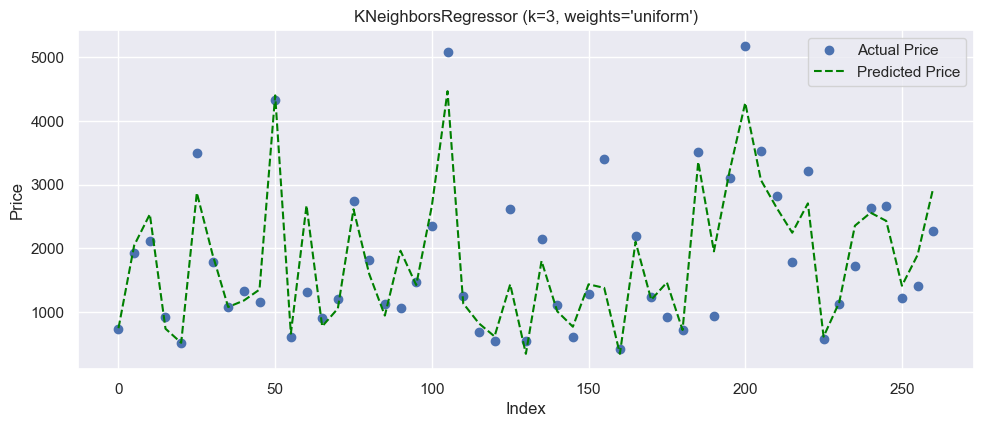

Best Hyperparameters for BaggingRegressor: {'n_estimators': 142}


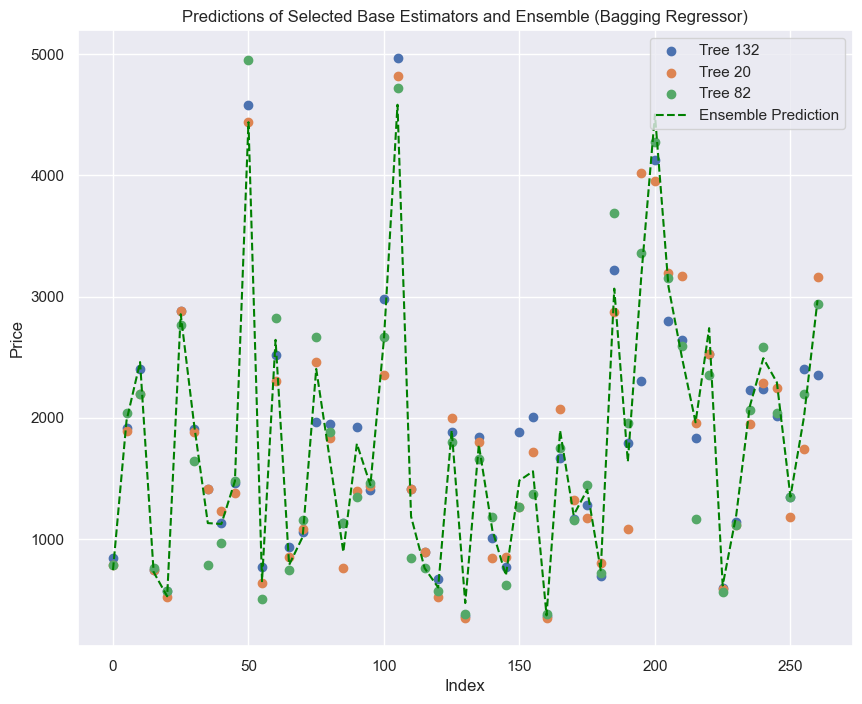

KNN Regressor:
Mean Squared Error: 222663.00383073647
R^2 Score: 0.8369015824000323
Bagging Ensemble:
Mean Squared Error: 198118.52183541757
R^2 Score: 0.8548801693470158


Enter Company:  1
Enter Product:  297
Enter TypeName:  4
Enter Inches:  13.3
Enter CPU:  2
Enter Memory:  4
Enter Weight:  1.37
Enter RAM (in GB):  8
Enter GPU:  58
Enter screen resolution:  10
Enter operating system:  8


Predicted price for the new laptop: $2439.693333333333
Predicted price for the new laptop (Bagging): $2313.2080046948354


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Standardise features by removing mean & scaling to unit variance
scaler = StandardScaler()  

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def random_search(estimator, param_distributions, X_train, y_train, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42):
    
    rs = RandomizedSearchCV(estimator=estimator, param_distributions=param_distributions, n_iter=n_iter, cv=cv, scoring=scoring, random_state=random_state)
    rs.fit(X_train, y_train)
    best_parameter = rs.best_params_
    return rs, best_parameter

def calculations(y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


# Define the parameter distributions for KNeighborsRegressor
parameters_knn = {
    'n_neighbors': randint(1, 20),   #Number of neighbours
    #Uniform: each neighbour contributes equally to prediction
    #Distance: closer neighbours have higher influence to prediction
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  #Distance metric: 1. Manhattan distance, 2. Euclidean distance
}

parameters_b = {
    'n_estimators': randint(50, 150),  # Number of base estimators
}
#------------------------------------------------------------------------------------------------
#KNN Regression 

random_search_knn, bp_knn= random_search(KNeighborsRegressor(), parameters_knn, X_train, y_train)
print("Best Hyperparameters for KNeighborsRegressor:", bp_knn)  #Find the best parameter for prediction

#Iterate through each actual and predicted price and plot a graph
for i, weights in enumerate({bp_knn['weights']}):
    best_k_regression = KNeighborsRegressor(**bp_knn)
    best_k_regression.fit(X_train_scaled, y_train)
    y_pred_knn = best_k_regression.predict(X_test_scaled)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, i + 1)
    
    # Plot actual prices at intervals
    x_values_actual = np.arange(0, len(y_test),5)  #Interval adjustable
    plt.plot(x_values_actual, y_test[::5], 'bo', label="Actual Price")  # Dot plot for actual prices
    
    # Plot predicted prices at intervals
    x_values_predicted = np.arange(0, len(y_pred_knn), 5)  #Interval adjustable
    plt.plot(x_values_predicted, y_pred_knn[::5], color='green', linestyle='--', label="Predicted Price")  # Continuous line for predicted prices
    
    plt.xlabel("Index")  #x-axis: indexes
    plt.ylabel("Price")  #y-axis: price
    plt.title(f"KNeighborsRegressor (k={bp_knn['n_neighbors']}, weights='{bp_knn['weights']}')")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


#----------------------------------------------------------------------------------------------------------
#K-bagging Regression

base_model = DecisionTreeRegressor()
random_search, bp_bagging  = random_search(BaggingRegressor(estimator=best_k_regression, random_state=42), parameters_b, X_train, y_train)
print("Best Hyperparameters for BaggingRegressor:", bp_bagging)  #Find the best parameter for prediction

bagging_regressor = BaggingRegressor(estimator=best_k_regression, n_estimators=bp_bagging['n_estimators'], random_state=42)
bagging_regressor.fit(X_train_scaled, y_train)

#Iterate each tree in estimators_ & predict price from test data & put predictions into a list
individual_tree_pred = np.array([tree.predict(X_test_scaled) for tree in bagging_regressor.estimators_])

# Randomly select three trees for plotting
np.random.seed(42)  # Set random seed for reproducibility
#Randomly select 3 indices from range in estimators & 'replace=false' ensure that each index is only selected once 
random_tree_indices = np.random.choice(len(bagging_regressor.estimators_), size=3, replace=False)

# Get predictions of the selected trees
selected_tree_predictions = individual_tree_pred[random_tree_indices]

y_pred_bagging = bagging_regressor.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
#Iterate & plot the 3 selected trees
for i, tree_index in enumerate(random_tree_indices):
    #Plot point every 5 indices intervals
    plt.scatter(range(0, len(selected_tree_predictions[i]), 5), selected_tree_predictions[i][::5], marker='o', label=f'Tree {tree_index+1}')
plt.plot(range(0, len(y_pred_bagging), 5), y_pred_bagging[::5], label='Ensemble Prediction', linestyle='--', color='green')

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Predictions of Selected Base Estimators and Ensemble (Bagging Regressor)')
plt.legend()
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------------

#Calculate MSE & R^2 values of KNN Regressor
print("KNN Regressor:")
k_calculations = calculations(y_pred_knn)

#Calculate MSE & R^2 values of K-bagging Regressor
print("Bagging Ensemble:")
b_calculations = calculations(y_pred_bagging)

#---------------------------------------------------------------------------------------------------------
#Company	Product	TypeName	Inches	ScreenResolution	Cpu	Ram	Memory	Gpu	OpSys	Weight

company = input("Enter Company: ")
product = input("Enter Product: ")
name = input("Enter TypeName: ")
inch = float(input("Enter Inches: "))
cpu = input("Enter CPU: ")
mem = input("Enter Memory: ")
weight = float(input("Enter Weight: "))
ram = int(input("Enter RAM (in GB): "))
gpu = input("Enter GPU: ")
resolution = int(input("Enter screen resolution: "))
os = input("Enter operating system: ")
    
# Create array containing user input data
new_specs = [[resolution, gpu, ram, os, company, product, name, inch, cpu, mem, weight]]
    
# Scale the input data using the same scaler used for training
new_specs_scaled = scaler.transform(new_specs)

predicted_price = best_k_regression.predict(new_specs_scaled)

print(f"Predicted price for the new laptop: ${predicted_price[0]}")

predicted_price_bagging = bagging_regressor.predict(new_specs_scaled)

print(f"Predicted price for the new laptop (Bagging): ${predicted_price_bagging[0]}")

# Analysis:

Linear regression MSE for all predictors: 472896.4212424667

Using KNN regression and bagging with all predictors, the MSE decreased, as compared to using only 4 predictors. 

Observing the KNeighborsRegressor graph, with the best n_neighbour and weights, and this time with uniform weights, means each neighbour contributes equally to the prediction, meaning if the data point is far away, it would still be considered, making it less sensitive to distribution and might not be able to capture the actual structure of the data set. Hence, the prediction (2439.69) is $300 higher than actual price of 2103.31, making the model less accurate. 

As for K-bagging regressor, it is within expectations that its MSE is lower than KNN regression, as it's supposed to improve the KNN regression model. The predicted price for this model is also lower than KNN regressor prediction. 

# Conclusion:

Overall, it is better to use predictors with higher correlation to the price for prediction, instead of all the predictors.